# BatchNorm and Dropout Analysis

This notebook contains the analysis of how different layers of batchnorm and dropoit effect the accuracy and training time of our Resnet50 model.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Read Data
data = pd.read_csv('../data/bn_dropout_batch_size_64.csv')
data.head()

,BN Layers,Drp Layers,Drp Probability,Accuracy,Training Time,TTA 0.87
0,0,0,0.0,0.7164,3980.160950,NaN
1,0,1,0.2,0.7403,4164.198270,416.766010
2,0,1,0.5,0.7122,4139.772803,886.688595
3,0,1,0.8,0.6577,4186.440722,1318.508839
4,0,2,0.2,0.7230,4373.524526,920.297521


## Dropout Layers

In [5]:
data_bn_0 = data.loc[data['BN Layers']==0]
data_bn_1 = data.loc[data['BN Layers']==1]
data_bn_2 = data.loc[data['BN Layers']==2]
data_bn_3 = data.loc[data['BN Layers']==3]

In [11]:
groups_bn_0 = data_bn_0.groupby('Drp Probability')
groups_bn_1 = data_bn_1.groupby('Drp Probability')
groups_bn_2 = data_bn_2.groupby('Drp Probability')
groups_bn_3 = data_bn_3.groupby('Drp Probability')

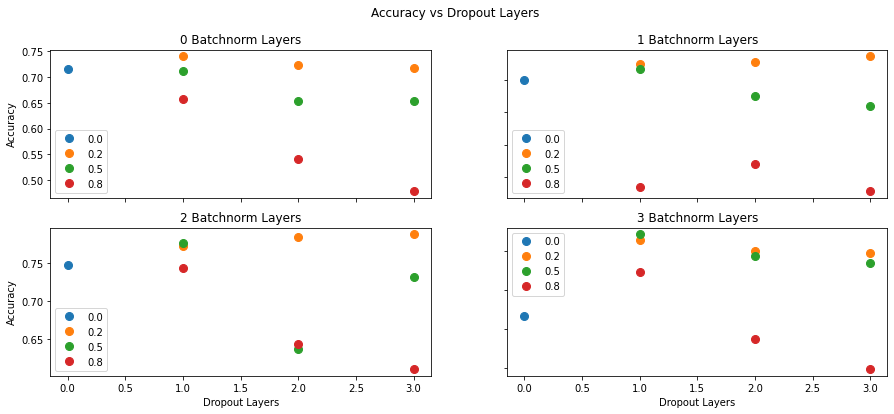

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Accuracy vs Dropout Layers')

for name, group in groups_bn_0:    
    axs[0,0].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='', ms=8,label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Batchnorm Layers')

for name, group in groups_bn_1:    
    axs[0,1].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='', ms=8, label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Batchnorm Layers')

for name, group in groups_bn_2:    
    axs[1,0].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='',ms=8,  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Batchnorm Layers')

for name, group in groups_bn_3:    
    axs[1,1].plot(group['Drp Layers'], group['Accuracy'], marker='o', linestyle='', ms=8,label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Batchnorm Layers')

for ax in axs.flat:
    ax.set(xlabel='Dropout Layers', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/acc_drplayer.jpg')

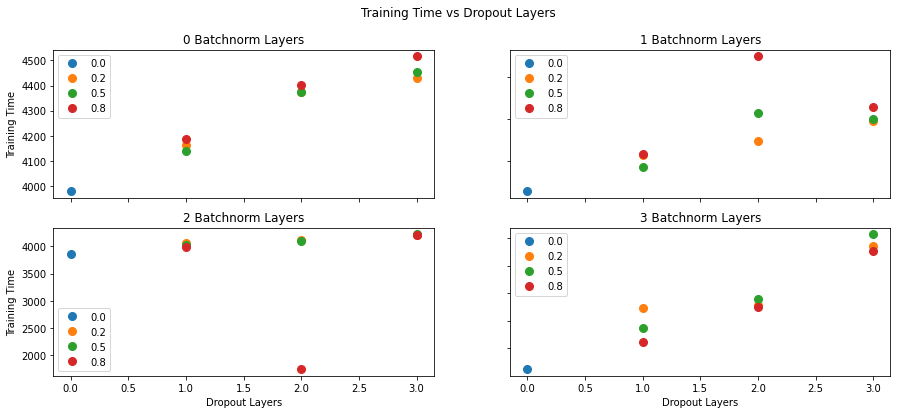

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Training Time vs Dropout Layers')

for name, group in groups_bn_0:    
    axs[0,0].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Batchnorm Layers')

for name, group in groups_bn_1:    
    axs[0,1].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Batchnorm Layers')

for name, group in groups_bn_2:    
    axs[1,0].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Batchnorm Layers')

for name, group in groups_bn_3:    
    axs[1,1].plot(group['Drp Layers'], group['Training Time'], marker='o', linestyle='', ms=8, label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Batchnorm Layers')

for ax in axs.flat:
    ax.set(xlabel='Dropout Layers', ylabel='Training Time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tt_drplayer.jpg')

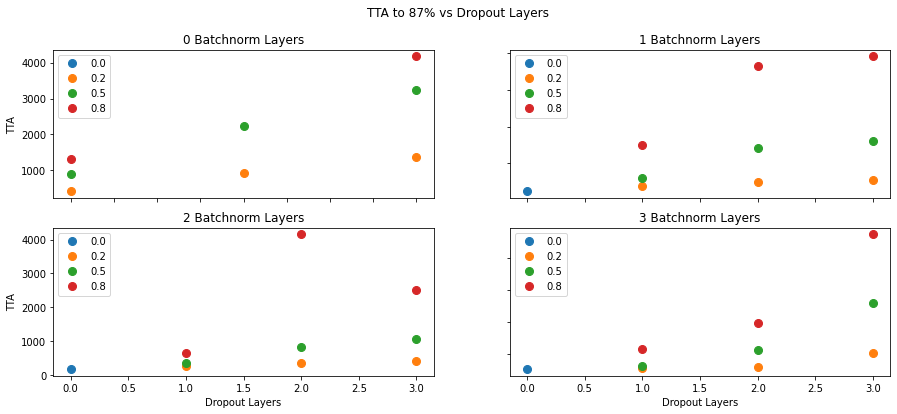

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('TTA to 87% vs Dropout Layers')

for name, group in groups_bn_0:    
    axs[0,0].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Batchnorm Layers')

for name, group in groups_bn_1:    
    axs[0,1].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Batchnorm Layers')

for name, group in groups_bn_2:    
    axs[1,0].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Batchnorm Layers')

for name, group in groups_bn_3:    
    axs[1,1].plot(group['Drp Layers'], group['TTA 0.87'], marker='o', linestyle='', ms=8, label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Batchnorm Layers')

for ax in axs.flat:
    ax.set(xlabel='Dropout Layers', ylabel='TTA')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tta_drplayer.jpg')

## BatchNorm Layers

In [25]:
data_d_0 = data.loc[data['Drp Layers']==0]
data_d_1 = data.loc[data['Drp Layers']==1]
data_d_2 = data.loc[data['Drp Layers']==2]
data_d_3 = data.loc[data['Drp Layers']==3]

In [26]:
groups_d_0 = data_d_0.groupby('Drp Probability')
groups_d_1 = data_d_1.groupby('Drp Probability')
groups_d_2 = data_d_2.groupby('Drp Probability')
groups_d_3 = data_d_3.groupby('Drp Probability')

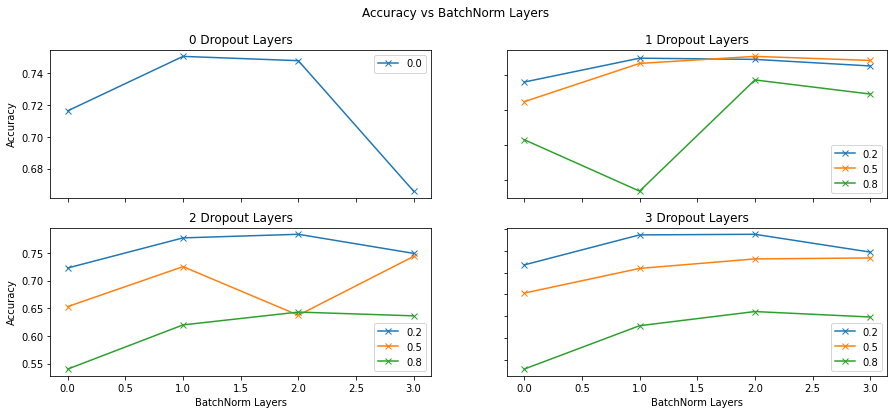

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Accuracy vs BatchNorm Layers')

for name, group in groups_d_0:    
    axs[0,0].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-', label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Dropout Layers')

for name, group in groups_d_1:    
    axs[0,1].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-',  label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Dropout Layers')

for name, group in groups_d_2:    
    axs[1,0].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-',  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Dropout Layers')

for name, group in groups_d_3:    
    axs[1,1].plot(group['BN Layers'], group['Accuracy'], marker='x', linestyle='-',  label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Dropout Layers')

for ax in axs.flat:
    ax.set(xlabel='BatchNorm Layers', ylabel='Accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/acc_bnlayer.jpg')

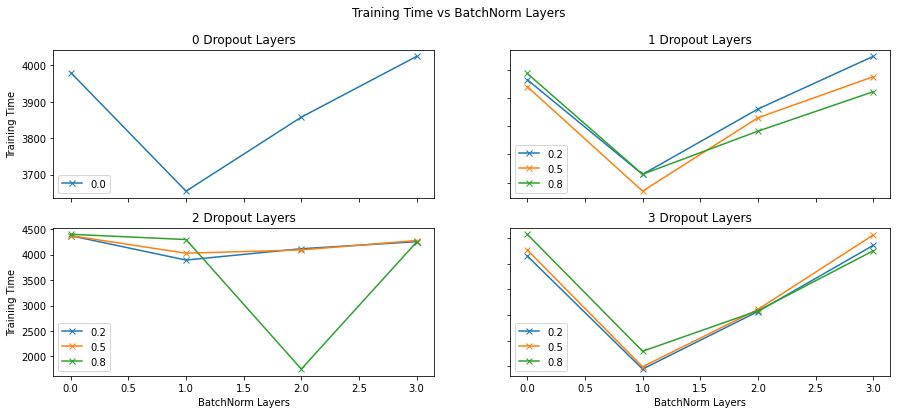

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('Training Time vs BatchNorm Layers')

for name, group in groups_d_0:    
    axs[0,0].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-', label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Dropout Layers')

for name, group in groups_d_1:    
    axs[0,1].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-',  label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Dropout Layers')

for name, group in groups_d_2:    
    axs[1,0].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-',  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Dropout Layers')

for name, group in groups_d_3:    
    axs[1,1].plot(group['BN Layers'], group['Training Time'], marker='x', linestyle='-',  label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Dropout Layers')

for ax in axs.flat:
    ax.set(xlabel='BatchNorm Layers', ylabel='Training Time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tt_bnlayer.jpg')

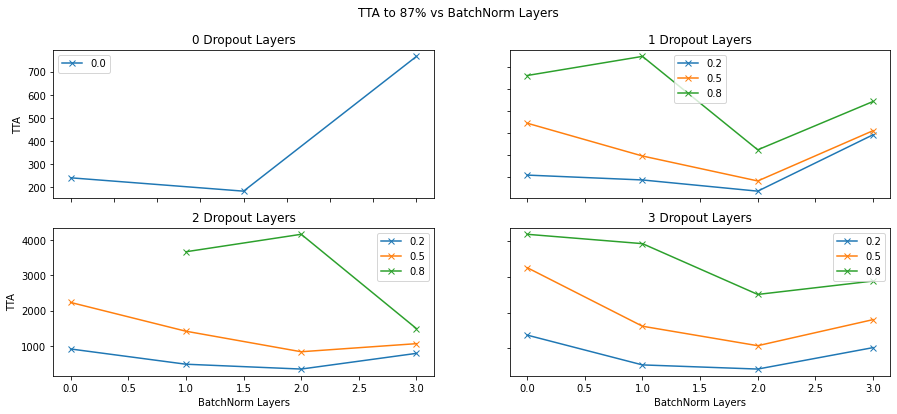

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('TTA to 87% vs BatchNorm Layers')

for name, group in groups_d_0:    
    axs[0,0].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-', label=name)
axs[0,0].legend()
axs[0, 0].set_title('0 Dropout Layers')

for name, group in groups_d_1:    
    axs[0,1].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-',  label=name)
axs[0,1].legend()
axs[0, 1].set_title('1 Dropout Layers')

for name, group in groups_d_2:    
    axs[1,0].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-',  label=name)
axs[1,0].legend()
axs[1,0].set_title('2 Dropout Layers')

for name, group in groups_d_3:    
    axs[1,1].plot(group['BN Layers'], group['TTA 0.87'], marker='x', linestyle='-',  label=name)
axs[1,1].legend()
axs[1,1].set_title('3 Dropout Layers')

for ax in axs.flat:
    ax.set(xlabel='BatchNorm Layers', ylabel='TTA')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('../figures/tta_bnlayer.jpg')